# 2) IACOV - Model Development for Prognosis - MV
## Strategy 7) Training on 70% of a specific hospital plus same absolute number of same region hospitals

In [ ]:
# !pip install npm nodejs

In [ ]:
# !jupyter lab clean
# !jupyter lab build

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

C:\Users\carin\AppData\Local\Temp\ipykernel_13948\2017038996.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### This code uses just 14 hospitals, since ICU or MV has no variation for 4 hospitals
#### - The code that prepares the data to run all strategies for ICU and MV is: PREPARING_DATA_TO_UCI_MV_ANALYSES
#### - df_iacov_en.csv (used for death) was replaced here by df_iacov_model_lean_14hosp.csv
#### - put df_iacov_model_lean_14hosp.csv in same folder as this notebook

In [2]:
#Put csv in same folder as this notebook
dataset = pd.read_csv("df_iacov_model_lean_14hosp.csv", delimiter=";")
df_iacov_model = pd.DataFrame(dataset)
df_iacov_model.shape

(6046, 30)

In [3]:
df_iacov_model.columns

Index(['city_hospital', 'age', 'male', 'race', 'heart_rate', 'resp_rate',
       'sys_press', 'dias_press', 'mean_press', 'temp', 'hemoglobin',
       'platelets', 'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv',
       'leukocytes', 'neutrophil', 'lymphocytes', 'basophils', 'eosinophils',
       'monocytes', 'crp', 'death', 'icu', 'mv', 'state', 'region', 'excluir'],
      dtype='object')

## 2.1) Assign binary outcome to be predicted

### 2.1.1) Maintain essential variables (LEAN Model)

In [4]:
#22 predictors + outcome + Region/State
df_iacov_model_lean = df_iacov_model[['city_hospital'
                                      ,'age'
                                      ,'male'
                                      ,'heart_rate'
                                      ,'resp_rate'
                                      ,'sys_press'
                                      ,'dias_press'
                                      ,'mean_press'
                                      ,'temp'
                                      ,'hemoglobin'
                                      ,'platelets'
                                      ,'hematocrit'
                                      ,'red_cells_count'
                                      ,'hcm'
                                      ,'rdw'
                                      ,'mcv'
                                      ,'leukocytes'
                                      ,'neutrophil'
                                      ,'lymphocytes'
                                      ,'basophils'
                                      ,'eosinophils'
                                      ,'monocytes'
                                      ,'crp'
                                      ,'mv'
                                      ,'region' #for filtering purposes
                                      ,'state' #for filtering purposes
                                     ]]
df_iacov_model_lean.shape

(6046, 26)

In [5]:
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [6]:
df_iacov_model_lean.to_csv('df_iacov_model_lean.csv', sep=';', index=False)

### 2.1.2) Filter a specific hospital

In [7]:
#Put csv in same folder as this notebook
df_all_hospitals = pd.read_csv("df_iacov_model_lean.csv", delimiter=";", decimal=".")
df_all_hospitals.shape

(6046, 26)

In [8]:
df_all_hospitals.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'mv', 'region', 'state'],
      dtype='object')

In [9]:
df_all_hospitals.region.value_counts()

region
NORDESTE       2389
SUDESTE        2129
SUL             695
CENTROOESTE     539
NORTE           294
Name: count, dtype: int64

In [10]:
column_summaries(df_all_hospitals)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,14,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0,0.000,98,0,float64,-0.060,6046.000,57.521,17.869,18.000,44.000,58.000,71.000,105.000
male,0,0.000,2,2790,float64,-0.155,6046.000,0.539,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,809,13.381,183,0,float64,0.611,5237.000,85.689,17.209,13.000,75.000,85.000,96.000,233.000
resp_rate,1457,24.099,69,1,float64,2.897,4589.000,21.881,6.380,0.000,18.000,20.000,24.000,108.000
sys_press,1336,22.097,215,0,float64,-0.279,4710.000,124.054,22.791,10.000,110.000,122.000,138.000,242.000
dias_press,1325,21.915,150,0,float64,-0.361,4721.000,74.608,14.626,6.000,67.000,76.000,81.000,141.000
mean_press,1366,22.593,1452,326,float64,-1.751,4680.000,83.731,28.475,0.000,78.981,90.000,98.648,166.000
temp,1173,19.401,128,1,float64,62.972,4873.000,36.430,4.976,0.000,36.000,36.300,36.800,372.000
hemoglobin,1904,31.492,226,0,float64,-0.628,4142.000,12.752,2.189,1.400,11.692,13.000,14.200,30.600


In [11]:
import ipywidgets as widgets
from IPython.display import clear_output

In [12]:
df_all_hospitals.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [13]:
# Hospitals excluded for ICU and MV analyses: 'HOSPSANTACASASP_FULL', 'HOSPGRUPOSANTA', 'HUTRIN_2021_02', 'RIO_DE_JANEIRO_HUCFF'
dropdown_hospital = widgets.Dropdown(options = ['Choose a hospital ...'
                                                ,'HC_USP'                     #SP
                                                ,'HOSPPORTUGUES_SALVADOR'     #BA
                                                ,'CEARA_UNIMED'               #CE
                                                ,'HRL_2021_02'                #GO - Luiziania
                                                ,'HMV_POA_02'                 #RS - Moinhos de Vento
                                                ,'RIO_DE_JANEIRO_UNIMED'      #RJ
                                                ,'HOSPSANTAJULIA_MANAUS'      #AM
                                                ,'HOSPSANTACATARINABLUMENAU'  #SC
                                                ,'HOSPSAOFRANCISCO_MOGIGUACU' #SP
                                                ,'PERNAMBUCO_FULL'            #PE
                                                ,'PELOTAS'                    #RS
                                                ,'CEARA_HUWC'                 #CE
                                                ,'HEVV'                       #ES - Vila Velha
                                                ,'AMAZONAS_HUGV'              #AM
#                                                 ,'GHC_02'                     #RS 
                                               ])

In [14]:
specific_hospital = 'Choose a hospital'
df_iacov_model_lean = df_all_hospitals

def dropdown_hospital_eventhandler(change):
    global specific_hospital 
    specific_hospital = change.new
    dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

In [15]:
dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

**Select Hospital to train**

In [16]:
# !pip install ipywidgets

In [17]:
# !jupyter nbextension enable --py widgetsnbextension

In [18]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [20]:
display(dropdown_hospital)

Dropdown(index=12, options=('Choose a hospital ...', 'HC_USP', 'HOSPPORTUGUES_SALVADOR', 'CEARA_UNIMED', 'HRL_…

**Filter all hospitals except the selected above**

In [21]:
df_all_hospitals.region.value_counts()

region
NORDESTE       2389
SUDESTE        2129
SUL             695
CENTROOESTE     539
NORTE           294
Name: count, dtype: int64

**Split train/test of specific Hospital**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#Filter the specific hospital
df_iacov_model_lean_specific = df_all_hospitals[df_all_hospitals.city_hospital == specific_hospital]
df_iacov_model_lean_specific.shape

(73, 26)

In [24]:
X_specific = df_iacov_model_lean_specific.drop(['mv'],axis=1)
X_specific.shape

(73, 25)

In [25]:
y_specific = df_iacov_model_lean_specific['mv']
y_specific.shape

(73,)

In [26]:
X_train_specific, X_test_specific, y_train_specific, y_test_specific = train_test_split(X_specific, y_specific, test_size=0.30, random_state=42, stratify=y_specific)

In [27]:
X_train_specific.shape

(51, 25)

In [28]:
X_test_specific.shape

(22, 25)

**Filter same absolute number from hospitals on same region**

PS: Also removed GHC hospital due to very low positive cases

In [29]:
from random import sample

#Sample all hospitals except specific hospital
df_all_hospitals_except_specific = df_all_hospitals[ (~df_all_hospitals.index.isin(X_specific.index)) &
                                                       (df_all_hospitals.city_hospital != 'GHC_02')]

#Sample all hospitals of same region of specific hospital
df_all_hospitals_same_region = df_all_hospitals_except_specific[df_all_hospitals_except_specific.region == X_specific.region.iloc[0]]

#Then, sample all hospital data with same absolute number on same region as specific hospital
df_iacov_model_lean = df_all_hospitals_same_region.sample(X_train_specific.shape[0], random_state=42, replace=True)
df_iacov_model_lean.shape

(51, 26)

If error Cannot take a larger sample than population when 'replace=False', use resample with replace

In [30]:
# #Then, sample all hospital data with same absolute number on same region as specific hospital
# df_iacov_model_lean = df_all_hospitals_same_region.sample(X_train_specific.shape[0], random_state=42, replace=True)
# df_iacov_model_lean.shape

In [31]:
#Check data from same region
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
HOSPPORTUGUES_SALVADOR    33
CEARA_UNIMED              15
PERNAMBUCO_FULL            3
Name: count, dtype: int64

**Append 70% data of specific hospital**

In [32]:
df_iacov_model_lean = pd.concat([df_iacov_model_lean, X_train_specific], axis=0)
df_iacov_model_lean.shape

(102, 26)

In [33]:
#Check after apending data of specific hospital
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
CEARA_HUWC                51
HOSPPORTUGUES_SALVADOR    33
CEARA_UNIMED              15
PERNAMBUCO_FULL            3
Name: count, dtype: int64

In [34]:
print("Specific: " + specific_hospital )
print("(training - same regions - same absolute number) dataset: " + str(df_iacov_model_lean.shape))

print("\n(training - specific) dataset: {}".format(X_train_specific.shape))

print("\n(test - specific) dataset: {}".format(X_test_specific.shape))

Specific: CEARA_HUWC
(training - same regions - same absolute number) dataset: (102, 26)

(training - specific) dataset: (51, 25)

(test - specific) dataset: (22, 25)


### 2.1.3) Dropping unused variables (All hospitals)

In [35]:
df_iacov_model_lean = df_iacov_model_lean.drop(['city_hospital'],axis=1)
df_iacov_model_lean.shape

(102, 25)

In [36]:
#Preencho NAs com 0 
df_iacov_model_lean['mv'] = df_iacov_model_lean['mv'].fillna(0)
df_iacov_model_lean.mv.value_counts()

mv
0.000    95
1.000     7
Name: count, dtype: int64

In [37]:
(df_iacov_model_lean.mv.value_counts()/len(df_iacov_model_lean.mv))*100

mv
0.000   93.137
1.000    6.863
Name: count, dtype: float64

### From now on the outcome will call CLASS

In [38]:
df_iacov_model_lean['class'] = df_iacov_model_lean['mv'].astype('int')
df_iacov_model_lean = df_iacov_model_lean.drop(['mv'],axis=1)

### 2.1.4) Recalculating null mean_press

In [39]:
def isNullMeanPressure(row):

    if pd.isnull(row['mean_press']):
    
        if pd.notnull(row['sys_press']) and pd.notnull(row['dias_press']):
            return (row['sys_press']+row['dias_press'])/2
        else:
            return row['mean_press']
    else:
        return row['mean_press']

In [40]:
#Check mean_press missing before recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,54,0,float64,0.072,102.000,53.951,18.864,20.000,38.000,55.000,67.750,95.000
male,0,0.000,2,45,float64,-0.240,102.000,0.559,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,7,6.863,51,0,float64,0.526,95.000,87.837,18.547,41.000,75.500,87.000,98.500,140.000
resp_rate,22,21.569,16,0,float64,1.242,80.000,20.175,4.096,14.000,18.000,19.500,21.250,34.000
sys_press,21,20.588,49,0,float64,-0.096,81.000,121.784,25.321,50.000,109.000,120.000,139.000,179.000
dias_press,21,20.588,44,0,float64,-0.362,81.000,73.105,15.528,35.000,65.000,78.000,80.000,109.000
mean_press,24,23.529,48,0,float64,-0.404,78.000,89.873,17.731,39.995,81.250,93.000,99.995,128.313
temp,17,16.667,34,0,float64,0.103,85.000,36.141,1.060,32.000,35.700,36.050,36.500,39.000
hemoglobin,10,9.804,62,0,float64,-0.342,92.000,11.580,2.906,5.800,9.088,12.100,13.825,18.100
platelets,10,9.804,90,0,float64,0.634,92.000,241643.478,151229.805,7160.000,126950.000,213250.000,352375.000,645700.000


In [41]:
df_iacov_model_lean['mean_press'] = df_iacov_model_lean.apply(isNullMeanPressure, axis=1)

In [42]:
#Check mean_press missing after recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,54,0,float64,0.072,102.000,53.951,18.864,20.000,38.000,55.000,67.750,95.000
male,0,0.000,2,45,float64,-0.240,102.000,0.559,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,7,6.863,51,0,float64,0.526,95.000,87.837,18.547,41.000,75.500,87.000,98.500,140.000
resp_rate,22,21.569,16,0,float64,1.242,80.000,20.175,4.096,14.000,18.000,19.500,21.250,34.000
sys_press,21,20.588,49,0,float64,-0.096,81.000,121.784,25.321,50.000,109.000,120.000,139.000,179.000
dias_press,21,20.588,44,0,float64,-0.362,81.000,73.105,15.528,35.000,65.000,78.000,80.000,109.000
mean_press,21,20.588,50,0,float64,-0.366,81.000,89.526,17.631,39.995,81.000,93.000,99.980,128.313
temp,17,16.667,34,0,float64,0.103,85.000,36.141,1.060,32.000,35.700,36.050,36.500,39.000
hemoglobin,10,9.804,62,0,float64,-0.342,92.000,11.580,2.906,5.800,9.088,12.100,13.825,18.100
platelets,10,9.804,90,0,float64,0.634,92.000,241643.478,151229.805,7160.000,126950.000,213250.000,352375.000,645700.000


In [43]:
X_test_specific['mean_press'] = X_test_specific.apply(isNullMeanPressure, axis=1)

In [44]:
#column_summaries(X_test_specific)

### Put X_test and y_test in separate files

In [45]:
x_test_specific_name = 'X_test_same_region_absolute_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
x_test_specific_name

'X_test_same_region_absolute_NORDESTE_CE_CEARA_HUWC.csv'

In [46]:
y_test_specific_name = 'y_death_same_region_absolute_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
y_test_specific_name

'y_death_same_region_absolute_NORDESTE_CE_CEARA_HUWC.csv'

In [47]:
X_test_specific.to_csv(x_test_specific_name, sep=';')
X_test_specific.shape

(22, 25)

In [48]:
y_test_specific.to_csv(y_test_specific_name, sep=';')
y_test_specific.shape

(22,)

## 2.4) Prepare Experiment 


In [49]:
df_iacov_model_lean.shape

(102, 25)

In [50]:
df_iacov_model_train = df_iacov_model_lean

In [51]:
df_iacov_model_train = df_iacov_model_train.drop(['region'],axis=1)
df_iacov_model_train = df_iacov_model_train.drop(['state'],axis=1)
df_iacov_model_train.columns

Index(['age', 'male', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp', 'class'],
      dtype='object')

In [52]:
df_iacov_model_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 2536 to 110
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              102 non-null    float64
 1   male             102 non-null    float64
 2   heart_rate       95 non-null     float64
 3   resp_rate        80 non-null     float64
 4   sys_press        81 non-null     float64
 5   dias_press       81 non-null     float64
 6   mean_press       81 non-null     float64
 7   temp             85 non-null     float64
 8   hemoglobin       92 non-null     float64
 9   platelets        92 non-null     float64
 10  hematocrit       92 non-null     float64
 11  red_cells_count  92 non-null     float64
 12  hcm              91 non-null     float64
 13  rdw              91 non-null     float64
 14  mcv              91 non-null     float64
 15  leukocytes       92 non-null     float64
 16  neutrophil       83 non-null     float64
 17  lymphocytes      8

In [53]:
exp = setup(df_iacov_model_train
            , target='class'
            , categorical_features = ['male']
            , numeric_features = ['crp','basophils','eosinophils','red_cells_count','monocytes','hemoglobin','resp_rate','neutrophil','hematocrit']
            , normalize=True
            #, remove_multicollinearity=True
            ,numeric_imputation='median'
#             ,numeric_imputation='ignore'
            #,multicollinearity_threshold=0.9
            , resample=True
            , resample_method='random_over'
#             , train_size = 1.0 #100pct for training
           )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(102, 23)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [54]:
X, y, X_train, X_test, y_train, y_test, seed, prep_pipe, _ = exp

In [55]:
X_train.shape

(132, 22)

In [56]:
X_test.shape

(31, 22)

In [57]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_0.0'],
      dtype='object')

In [58]:
seed

42

In [59]:
# Xtrain.head()

### Filtering only 5 pre-selected models

In [60]:
# print(inspect.getsource(compare_models))

In [61]:
#Modelos que suportam missing (1) - Modelos pre-selecionados(2)
compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","et","mlp","rf"] , turbo = False)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999800,0.531000,0.974800
1,Light Gradient Boosting Machine,0.992300,1.000000,1.000000,0.985700,0.985700,0.992300,0.984700,0.998900,0.687400,0.962900
2,CatBoost Classifier,0.992300,1.000000,1.000000,0.983300,0.987500,0.993300,0.984300,0.999600,0.531100,0.976000


### Tune selected models by AUC (and hyperopt bayesian optimization) to use on test data

In [62]:
cattuned = tune_model('catboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.523,0.993
1,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.529,0.989
2,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.664,0.998
3,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.523,0.992
4,0.923,1.000,1.000,0.857,0.857,0.923,0.847,0.991,0.954,0.851
5,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.563,0.990
6,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.476,0.967
7,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.437,0.954
8,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.638,0.995
9,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.513,0.938


In [63]:
lgbmtuned = tune_model('lightgbm', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.886,1.000
1,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.781,0.999
2,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.907,1.000
3,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.671,0.996
4,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.825,1.000
5,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.913,1.000
6,0.923,1.000,1.000,0.833,0.875,0.933,0.843,0.997,0.840,0.892
7,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.669,0.996
8,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.852,1.000
9,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.653,0.937


In [64]:
xgbtuned = tune_model('xgboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.999,0.355,0.976
1,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.999,0.372,0.983
2,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.408,0.987
3,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.996,0.276,0.950
4,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.999,0.344,0.973
5,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.431,0.988
6,0.923,1.000,1.000,0.833,0.875,0.933,0.843,0.990,0.647,0.856
7,0.923,1.000,1.000,0.833,0.875,0.933,0.843,0.996,0.316,0.891
8,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.386,0.966
9,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.999,0.368,0.923


### Select best algorithm based on test data AUC

In [65]:
preds_cat = predict_model(cattuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.903,0.776,0.000,0.966,0.000,0.000,-0.045,0.361,0.594,-0.213


In [66]:
preds_lgb = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.871,0.931,0.000,0.931,0.000,0.000,-0.069,0.687,0.000,-0.568


In [67]:
preds_xgb = predict_model(xgbtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.903,0.948,0.000,0.966,0.000,0.000,-0.045,0.968,0.370,0.108


In [68]:
# Put in PREDS the best algorithm chosen in the previous lines: preds_cat OR preds_lgb OR preds_xgb
#preds = preds_cat
#preds = preds_lgb
preds = preds_xgb

### Best model

In [69]:
npv(y_test, preds['Label'])

0.9333333333333333

In [70]:
#ROC AUC (INTERVALO)
["{0:0.2f}".format(i) for i in AUC_CI(y_test, preds['Score'].values)]

['0.87', '1.00']

In [71]:
import MLFlow_Utils
binary_classification_metrics(y_test, preds["Label"], preds["Score"])

ZeroDivisionError: float division by zero

### Understand best algorithm features and results 
#### Run INTERPRETE_MODEL only for the best algorithm chosen in the previous line¶

In [72]:
#evaluate_model(lgbmtuned)

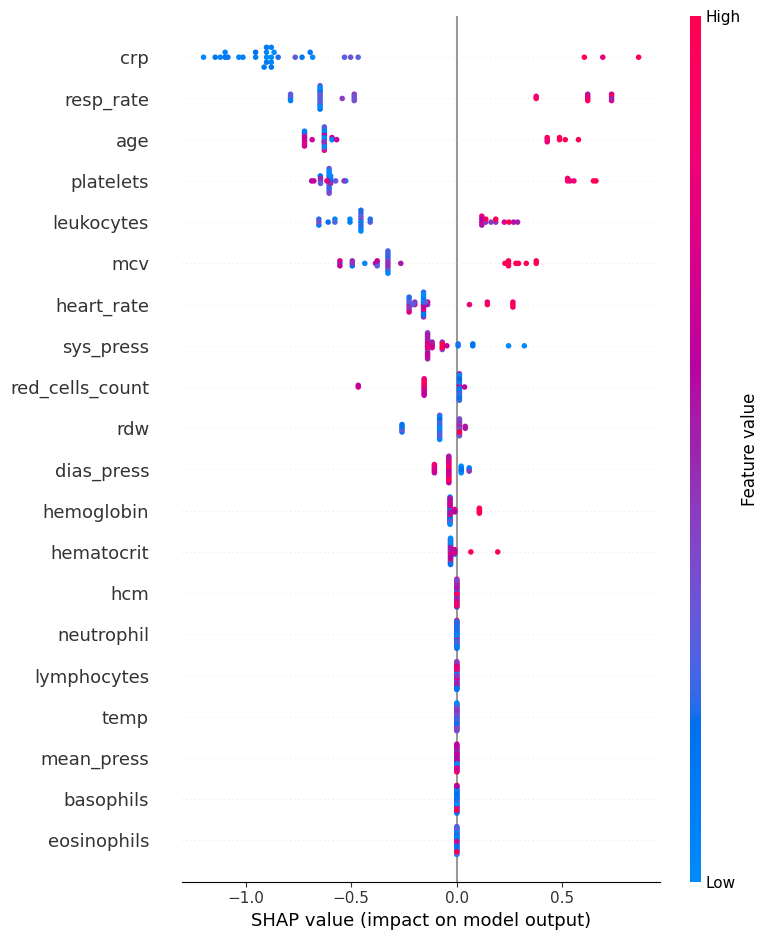

In [73]:
#interpret_model(cattuned)
#interpret_model(lgbmtuned)
interpret_model(xgbtuned)

In [74]:
#plot_model(lgbmtuned, plot='ktops')

### 2.3.1) Build a model with all data
#### Run FINALIZE MODEL only for the best algorithm chosen in the previous lines

In [75]:
#final_model = finalize_model(cattuned)
#final_model = finalize_model(lgbmtuned)
final_model = finalize_model(xgbtuned)

In [76]:
str(final_model.__class__.__name__)

'XGBClassifier'

In [77]:
final_model_name = str(final_model.__class__.__name__) + '_same_region_abs_number_' \
                    + X_test_specific.region.iloc[0]  \
                    + '_' + X_test_specific.state.iloc[0]  \
                    + '_' + X_test_specific.city_hospital.iloc[0]
final_model_name

'XGBClassifier_same_region_abs_number_NORDESTE_CE_CEARA_HUWC'

In [78]:
save_model(final_model, final_model_name ,verbose=True)

Transformation Pipeline and Model Succesfully Saved


In [80]:
#final_model.get_all_params()
final_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.55, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.295, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1.0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=275, n_jobs=-2,
              num_parallel_tree=None, random_state=42, ...)

# Use the saved model to predict on specific hospital

In [81]:
import pickle
import joblib

#Carrego o modelo unico
print('loaded: ' + final_model_name)

same_region_abs_number_model_pkl = final_model_name + ".pkl"
prep_pipe_same_region_abs_number, same_region_abs_number_model = joblib.load(same_region_abs_number_model_pkl)

loaded: XGBClassifier_same_region_abs_number_NORDESTE_CE_CEARA_HUWC


In [82]:
same_region_abs_number_model.__class__.__name__

'XGBClassifier'

In [83]:
x_test_specific_name

'X_test_same_region_absolute_NORDESTE_CE_CEARA_HUWC.csv'

In [84]:
#Carrego o X_test do modelo único
X_test_single = pd.read_csv(x_test_specific_name, delimiter=";",index_col=0)
X_test_single.shape

(22, 25)

In [85]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state'],
      dtype='object')

In [86]:
#Carrego o Y_test do modelo único
y_test_single = pd.read_csv(y_test_specific_name, delimiter=";",index_col=0)
y_test_single = y_test_single["mv"]
y_test_single.shape

(22,)

In [87]:
pd.set_option('display.max_columns', None)
X_test_single.head()

,city_hospital,age,male,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,region,state
98,CEARA_HUWC,58.000,1.000,66.000,17.000,120.000,70.000,87.000,36.100,9.800,157300.000,29.200,3.380,28.900,12.600,86.500,2460.000,1057.000,762.000,0.000,123.000,516.000,2.660,NORDESTE,CE
113,CEARA_HUWC,60.000,0.000,87.000,16.000,118.000,69.000,85.000,35.000,5.000,826600.000,16.600,2.280,22.100,17.600,72.900,11970.000,7608.000,2958.000,77.000,161.000,1166.000,NaN,NORDESTE,CE
103,CEARA_HUWC,64.000,1.000,88.000,23.000,92.000,60.000,71.000,35.600,7.900,149600.000,23.200,2.240,35.600,17.400,103.600,11110.000,10110.000,556.000,0.000,0.000,444.000,9.610,NORDESTE,CE
53,CEARA_HUWC,71.000,1.000,75.000,16.000,81.000,54.000,63.000,35.500,7.200,98550.000,22.670,2.500,29.100,17.000,90.700,9285.000,6707.000,1418.000,40.000,800.000,317.000,13.380,NORDESTE,CE
84,CEARA_HUWC,69.000,1.000,88.000,28.000,131.000,55.000,80.000,35.200,10.900,160000.000,33.100,3.720,29.500,12.200,89.100,23720.000,23008.000,238.000,0.000,0.000,474.000,14.020,NORDESTE,CE


In [88]:
X_test_single["class"] = y_test_single

In [89]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state', 'class'],
      dtype='object')

In [90]:
X_test_single = X_test_single.drop(['city_hospital'],axis=1)
X_test_single = X_test_single.drop(['region'],axis=1)
X_test_single = X_test_single.drop(['state'],axis=1)

In [91]:
X_test_single_transformed = prep_pipe_same_region_abs_number.fit_transform(X_test_single)
X_test_single_transformed.head()

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
male,Categorical
heart_rate,Numeric
resp_rate,Numeric
sys_press,Numeric
dias_press,Numeric
mean_press,Numeric
temp,Numeric
hemoglobin,Numeric
platelets,Numeric


,class,age,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,male_1.0
98,0,-0.187,-1.411,-0.301,-0.084,-0.322,-0.208,0.090,0.079,-0.333,-0.055,-0.040,0.087,-0.697,-0.089,-1.221,-1.066,-0.744,-0.918,-0.240,-0.099,-1.058,1.000
113,0,-0.037,0.446,-0.546,-0.156,-0.380,-0.307,-1.054,-2.372,3.814,-2.295,-1.628,-1.855,0.881,-1.658,0.913,0.397,2.264,1.091,-0.099,2.300,0.022,0.000
103,0,0.262,0.535,1.170,-1.084,-0.902,-1.002,-0.430,-0.891,-0.380,-1.121,-1.686,2.000,0.818,1.883,0.720,0.955,-1.026,-0.918,-0.697,-0.365,0.330,1.000
53,1,0.786,-0.615,-0.546,-1.477,-1.250,-1.400,-0.534,-1.249,-0.697,-1.215,-1.311,0.144,0.691,0.395,0.310,0.196,0.155,0.126,2.273,-0.834,1.082,1.000
84,1,0.637,0.535,2.396,0.308,-1.192,-0.555,-0.846,0.641,-0.316,0.639,0.451,0.258,-0.823,0.211,3.549,3.836,-1.462,-0.918,-0.697,-0.254,1.210,1.000


In [92]:
X_test_single_transformed = X_test_single_transformed.drop(['class'],axis=1)

In [93]:
X_test_single_transformed.shape

(22, 22)

In [94]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_0.0'],
      dtype='object')

In [95]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [96]:
#Show distinct columns
distinct_columns = X_test[X_test.columns.difference(X_test_single_transformed.columns)].columns.tolist()
distinct_columns

['male_0.0']

### Add missing columns to some hospitals that didn't collect all columns
e.g. HC_USP (missing: red_cells_count and eosinophils)

In [97]:
for column in distinct_columns:
    if(column=='male_0.0'):
        X_test_single_transformed['male_0.0'] = X_test_single_transformed['male_1.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_1.0', axis=1)
    elif(column=='male_1.0'):
        X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_0.0', axis=1)
    else:
        X_test_single_transformed[column]=np.NaN

In [98]:
# X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)

In [99]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_0.0'],
      dtype='object')

In [100]:
X_test_single_transformed.shape

(22, 22)

In [101]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_0.0'],
      dtype='object')

In [102]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_0.0'],
      dtype='object')

**Reorder columns**

In [103]:
# X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)

In [104]:
# Reorder columns
X_test_single_transformed = X_test_single_transformed[X_test.columns]
X_test_single_transformed.shape

(22, 22)

In [105]:
X_test_same_region_absolute_vs_one_name = 'X_test_same_region_absolute_vs_one_transformed_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
X_test_same_region_absolute_vs_one_name

'X_test_same_region_absolute_vs_one_transformed_NORDESTE_CE_CEARA_HUWC.csv'

In [106]:
X_test_single_transformed.to_csv(X_test_same_region_absolute_vs_one_name, sep=';')

In [ ]:
#Vejo a curva ROC do modelo INDIVIDUAL e confirmo o valor da AUC
from sklearn.metrics import (roc_curve,auc)

y_pred_prob1 = same_region_abs_number_model.predict_proba(X_test_single_transformed)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_single, y_pred_prob1)

auc_ind = auc(fpr1, tpr1)
print(auc_ind)
plt.plot(fpr1, tpr1, label= "Single Model - best model - AUC " +  str(auc_ind), color="yellow")

In [ ]:
y_pred_prob1.shape

In [ ]:
y_pred = same_region_abs_number_model.predict(X_test_single_transformed)

In [ ]:
import MLFlow_Utils
binary_classification_metrics(y_test_single, y_pred, pd.Series(y_pred_prob1))

In [ ]:
fprate, tprate, thresholds = roc_curve(y_test_single, y_pred_prob1, pos_label=1)
auc(fprate, tprate)

In [ ]:
#ROC_AUC
["{0:0.2f}".format(i) for i in AUC_CI(y_test_single, y_pred_prob1)]

In [ ]:
#recall
tpr(y_test_single, y_pred)

In [ ]:
#specificidade
tnr(y_test_single, pd.Series(y_pred))

In [ ]:
#accuracy
accuracy(y_test_single, y_pred)

In [ ]:
ppv(y_test_single, y_pred)

In [ ]:
npv(y_test_single, y_pred)

# End of File